In [1]:
import numpy as np
import pandas as pd
import ROOT
import matplotlib.pyplot as plt
import truth_neutron_visualization as v
from matplotlib import rc
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
rc('text', usetex=False)

Welcome to JupyROOT 6.22/02


/home/jeef/anaconda3/envs/my_root_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/jeef/workspace/jeff_workspace/analysis/phase3/with_sim/new_analysis.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  means[col]=0 #will be deleted at the end. Used so we can append rows of means
/home/jeef/workspace/jeff_workspace/analysis/phase3/with_sim/new_analysis.py:271: SettingWithCopyWarning: 


In [2]:
a = v.analysis()

In [3]:
#MC = a.get_MC_data('RBB_Lumi')
MC_LER = a.get_MC_data('Touschek_LER')

In [4]:
#elepaio = MC['elepaio_RBB_Lumi']
#palila = MC['palila_RBB_Lumi']
#tako = MC['tako_RBB_Lumi']
#iiwi = MC['iiwi_RBB_Lumi']
#nene = MC['nene_RBB_Lumi']
#humu = MC['humu_RBB_Lumi']

#iiwi = iiwi.loc[(iiwi['truthNeutronVtx_z_belle_frame']>1390) & (iiwi['truthNeutronVtx_z_belle_frame']<1680) 
#                & (iiwi['truthNeutronVtx_x_belle_frame']<80) & (iiwi['truthNeutronVtx_x_belle_frame']>30) 
#                & (np.abs(iiwi['truthNeutronVtx_y_belle_frame'])<20)] #FWD and BWD hotspots

#nene = nene.loc[(nene['truthNeutronVtx_z_belle_frame']>1390) & (nene['truthNeutronVtx_z_belle_frame']<1680) 
#                & (nene['truthNeutronVtx_x_belle_frame']<80) & (nene['truthNeutronVtx_x_belle_frame']>30) 
#                & (np.abs(nene['truthNeutronVtx_y_belle_frame'])<20)] #FWD and BWD hotspots

#humu = humu.loc[(humu['truthNeutronVtx_z_belle_frame']>1390) & (humu['truthNeutronVtx_z_belle_frame']<1680) 
#                & (humu['truthNeutronVtx_x_belle_frame']<80) & (humu['truthNeutronVtx_x_belle_frame']>30) 
#                & (np.abs(humu['truthNeutronVtx_y_belle_frame'])<20)] #FWD and BWD hotspots
iiwi = MC_LER['iiwi_Touschek_LER']
nene = MC_LER['nene_Touschek_LER']
humu = MC_LER['humu_Touschek_LER']
#tako = tako.loc[(tako['truthNeutronVtx_z_belle_frame']>-870) & 
#               (tako['truthNeutronVtx_z_belle_frame']<-750) & (tako['truthNeutronVtx_x_belle_frame']>20) & 
#               (tako['truthNeutronVtx_x_belle_frame']<60) & (np.abs(tako['truthNeutronVtx_y_belle_frame'])<20)]

#palila = palila.loc[(palila['truthNeutronVtx_z_belle_frame']>-870) & 
#               (palila['truthNeutronVtx_z_belle_frame']<-750) & (palila['truthNeutronVtx_x_belle_frame']>20) & 
#               (palila['truthNeutronVtx_x_belle_frame']<60) & (np.abs(palila['truthNeutronVtx_y_belle_frame'])<20)]

#elepaio = elepaio.loc[(elepaio['truthNeutronVtx_z_belle_frame']>-870) & 
#               (elepaio['truthNeutronVtx_z_belle_frame']<-750) & (elepaio['truthNeutronVtx_x_belle_frame']>20) & 
#               (elepaio['truthNeutronVtx_x_belle_frame']<60) & (np.abs(elepaio['truthNeutronVtx_y_belle_frame'])<20)]

### Convert to 1MeV fluxes weighted by NIEL

In [26]:
def add_NIEL_weights(df, ekey = 'truthNeutronEnergy'):
    conversion = [] #list to be added to dataframe
    e = df[ekey].to_numpy() #use numpy to speed things up
    neutrons = pd.read_csv('neutrons.csv')
    neutrons = neutrons.drop(columns = neutrons.columns[0])
    conv = neutrons[['E','weight']].to_numpy()
    for i in range(0,len(e)):
        index = 0
        diff = 1e9
        for j in range(0,len(conv)):
            if np.abs(e[i] - conv[j][0]) < diff:
                diff = np.abs(e[i] - conv[j][0])
                index = j
        conversion.append(conv[index][1])
    df['NIEL_weight'] = conversion
#add_NIEL_weights(tako)
#add_NIEL_weights(palila)
#add_NIEL_weights(elepaio)
add_NIEL_weights(iiwi)
add_NIEL_weights(nene)
add_NIEL_weights(humu)

In [ ]:
#print(len(tako), tako['NIEL_weight'].sum())
#print(len(palila), palila['NIEL_weight'].sum())
#print(len(elepaio), elepaio['NIEL_weight'].sum())
print(len(iiwi), iiwi['NIEL_weight'].sum())
print(len(nene), nene['NIEL_weight'].sum())
print(len(humu), humu['NIEL_weight'].sum())

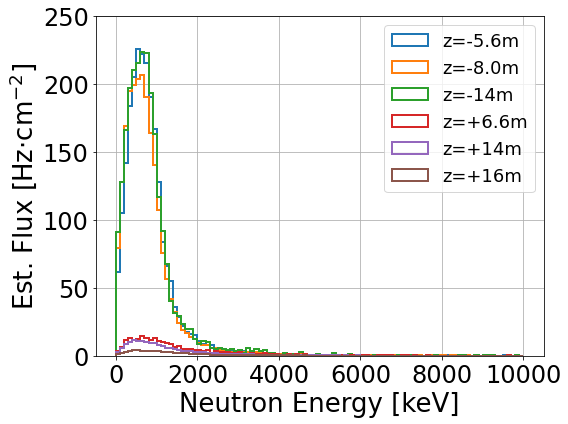

In [21]:
lw=2

plt.rc('legend', fontsize=18)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rc('axes', labelsize=26)
plt.rc('axes', titlesize=26)

fig, ax = plt.subplots(1,1, figsize = (8,6))
(counts, bins) = np.histogram(palila['truthNeutronEnergy'], bins=100, range = (0,1e4))
factor = .1167
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=-5.6m', lw=lw)
ax.set_xlabel('Neutron Energy [keV]')
ax.set_ylabel(r'Est. Flux [Hz$\cdot$cm$^{-2}$]')
ax.set_ylim(0,250)

(counts, bins) = np.histogram(tako['truthNeutronEnergy'], bins=100, range = (0,1e4))
factor = 0.0295
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=-8.0m', lw=lw)

(counts, bins) = np.histogram(elepaio['truthNeutronEnergy'], bins=100, range = (0,1e4))
factor = 0.375
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=-14m', lw=lw)

(counts, bins) = np.histogram(iiwi['truthNeutronEnergy'], bins=100, range = (0,1e4))
factor = 0.07
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=+6.6m', lw=lw)

(counts, bins) = np.histogram(nene['truthNeutronEnergy'], bins=100, range = (0,1e4))
factor = .00277
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=+14m', lw=lw)

(counts, bins) = np.histogram(humu['truthNeutronEnergy'], bins=100, range = (0,1e4))
factor = 0.000814
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=+16m', lw=lw)

ax.grid()
plt.legend()

plt.tight_layout()
plt.savefig('truth_lumi_spectrum.jpg')
plt.show()

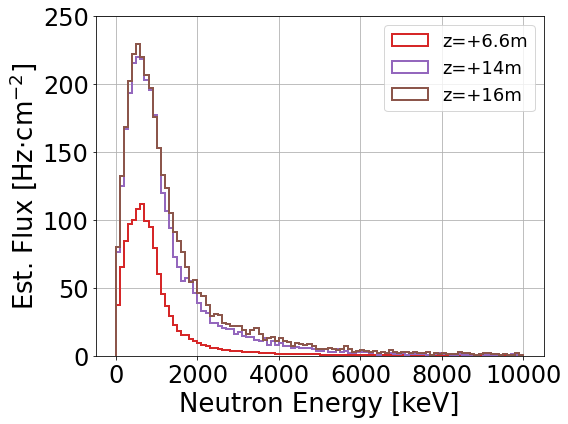

"\nplt.rc('legend', fontsize=12)\nplt.rc('xtick', labelsize=16)\nplt.rc('ytick', labelsize=16)\nplt.rc('axes', labelsize=18)\nplt.rc('axes', titlesize=18)\n\nfig, ax = plt.subplots(3,1, figsize = (7,12))\n(counts, bins) = np.histogram(iiwi['truthNeutronEnergy'], bins=100, range = (0,1e4))\nfactor = .0227\n#factor = 0.07\nax[0].hist(bins[:-1], bins, weights=factor*counts)\nax[0].set_xlabel('Neutron Energy [keV]')\nax[0].set_ylabel(r'Est. Flux [Hz$\\cdot$cm$^{-2}$]')\nax[0].set_title('Iiwi (z=+6.5m)')\n#ax[0].set_ylim(0,125)\nax[0].grid()\n\n(counts, bins) = np.histogram(nene['truthNeutronEnergy'], bins=100, range = (0,1e4))\nfactor = 0.158\n#factor = .00277\nax[1].hist(bins[:-1], bins, weights=factor*counts)\nax[1].set_xlabel('Neutron Energy [keV]')\nax[1].set_ylabel(r'Est. Flux [Hz$\\cdot$cm$^{-2}$]')\nax[1].set_title('nene (z=+14m)')\n#ax[1].set_ylim(0,125)\nax[1].grid()\n\n(counts, bins) = np.histogram(humu['truthNeutronEnergy'], bins=100, range = (0,1e4))\nfactor = 0.2306\n#factor =

In [27]:
lw=2

plt.rc('legend', fontsize=18)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rc('axes', labelsize=26)
plt.rc('axes', titlesize=26)

fig, ax = plt.subplots(1,1, figsize = (8,6))

ax.set_xlabel('Neutron Energy [keV]')
ax.set_ylabel(r'Est. Flux [Hz$\cdot$cm$^{-2}$]')
ax.set_ylim(0,250)

(counts, bins) = np.histogram(iiwi['truthNeutronEnergy'], bins=100, range = (0,1e4))
factor = 0.0227
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=+6.6m', lw=lw, color = 'tab:red')

(counts, bins) = np.histogram(nene['truthNeutronEnergy'], bins=100, range = (0,1e4))
factor = 0.158
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=+14m', lw=lw, color = 'tab:purple')

(counts, bins) = np.histogram(humu['truthNeutronEnergy'], bins=100, range = (0,1e4))
factor = 0.2306
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=+16m', lw=lw, color = 'tab:brown')

ax.grid()
plt.legend()

plt.tight_layout()
plt.savefig('truth_LER_touschek_spectrum.jpg')
plt.show()



'''
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)

fig, ax = plt.subplots(3,1, figsize = (7,12))
(counts, bins) = np.histogram(iiwi['truthNeutronEnergy'], bins=100, range = (0,1e4))
factor = .0227
#factor = 0.07
ax[0].hist(bins[:-1], bins, weights=factor*counts)
ax[0].set_xlabel('Neutron Energy [keV]')
ax[0].set_ylabel(r'Est. Flux [Hz$\cdot$cm$^{-2}$]')
ax[0].set_title('Iiwi (z=+6.5m)')
#ax[0].set_ylim(0,125)
ax[0].grid()

(counts, bins) = np.histogram(nene['truthNeutronEnergy'], bins=100, range = (0,1e4))
factor = 0.158
#factor = .00277
ax[1].hist(bins[:-1], bins, weights=factor*counts)
ax[1].set_xlabel('Neutron Energy [keV]')
ax[1].set_ylabel(r'Est. Flux [Hz$\cdot$cm$^{-2}$]')
ax[1].set_title('nene (z=+14m)')
#ax[1].set_ylim(0,125)
ax[1].grid()

(counts, bins) = np.histogram(humu['truthNeutronEnergy'], bins=100, range = (0,1e4))
factor = 0.2306
#factor = 0.000814
ax[2].hist(bins[:-1], bins, weights=factor*counts)
ax[2].set_xlabel('Neutron Energy [keV]')
ax[2].set_ylabel(r'Est. Flux [Hz$\cdot$cm$^{-2}$]')
ax[2].set_title('Humu (z=+16m)')
#ax[2].set_ylim(0,125)
ax[2].grid()

plt.tight_layout()
plt.show()
'''
#(counts, bins) = np.histogram(tako['truthNeutronEnergy'], bins=100, range = (0,1e4))
#factor = 0.732
#ax.hist(bins[:-1], bins, histtype = 'step', weights=factor*counts)


### Convert fluxes to 1MeV equivalent rates weighted by NIEL

In [ ]:
df = pd.read_csv('neutrons.csv')
df = df.drop(columns = df.columns[0])

In [ ]:
MC

In [ ]:
tako

In [ ]:
ne = tako['truthNeutronEnergy'].to_numpy()
conv = df[['E','weight']].to_numpy()

In [ ]:
conversion = []
for i in range(0,len(tako)):
    index = 0
    diff = 1000
    for j in range(0,len(df)):
        if np.abs(ne[i] - conv[j][0]) < diff:
            diff = np.abs(ne[i] - conv[j][0])
            index = j
    conversion.append(conv[index][1])
        

In [ ]:
df.loc[df['E']>80]

In [ ]:
tako['truthNeutronEnergy']

In [ ]:
conversion